# Lista 2 - Alexandre Nunes
COE718 - Proc. Adaptativo de Sinais

In [140]:
# bibliotecas úteis
import numpy as np
import matplotlib.pyplot as plt

### Implementação do Algoritmo LMS

In [145]:
import numpy as np

class LMS:
    """
    Description
    ---------
    
    Implements the Complex LMS algorithm for COMPLEX valued data.
    (Algorithm 3.2 - book: Adaptive Filtering: Algorithms and Practical Implementation, Diniz)
    
    Author: Alexandre Henrique da Silva Nunes
    Based on Matlab code by Markus Vinícius Santos Limas available at 
    https://www.mathworks.com/matlabcentral/fileexchange/3582-adaptive-filtering
    
    Methods
    ---------
    fit :
        update filter params based on a desired signal and inputs.
    """
    
    def __init__(self, filter_order_num, initial_coefficients):
        """
        Inputs
        -------
        
        filter_order_num : int
                    Order of the FIR filter
        initial_coefficients : numpy array (collumn vector)
                    initial filter coefficients
                
                    
        Variables
        --------
        num_of_coefficients : int
            FIR filter number of coefficients.
        
        errors_vector : numpy array
            FIR error vectors. error_vector[k] represents the output erros at iteration k.
        outputs_vector : numpy array (collumn vector)
            Store the estimated output of each iteration. outputs_vector[k] represents the output erros at iteration k
        coefficients_mtx : numpy array
            Store the estimated coefficients for each iteration. (Coefficients at one iteration are COLUMN vector)
        """
        
        self.filter_order_num = filter_order_num
        self.num_of_coefficients = self.filter_order_num + 1
        
        self.errors_vector = np.array([0])
        self.outputs_vector = np.array([0])
        self.coefficients_mtx = np.array(initial_coefficients)
        
    def fit(self, desired, x, step):
        """
        Fit filter parameters to considering desired vector and input x. desired and x must have length K,
        where K is the number of iterations
        
        Inputs
        -------
        
        desired : numpy array (row vector)
            desired signal
        x : numpy array (row vector)
            input signal to feed filter
        step : Convergence (relaxation) factor.
        
        Outputs
        -------
        
        python dic :
            outputs : numpy array (collumn vector)
                Store the estimated output of each iteration. outputs_vector[k] represents the output erros at iteration k
            errors : numpy array (collumn vector)
                FIR error vectors. error_vector[k] represents the output erros at iteration k.
            coefficients_mtx : numpy array
                Store the estimated coefficients for each iteration. (Coefficients at one iteration are COLUMN vector)      
        """
        
        k_max = self._dim(desired)
        self._initialize_vars(k_max)
        
        for k in range(k_max):
            x_k = LMS.tapped_x(x, self.num_of_coefficients, k)
            w_k = self.coefficients_mtx[:, k]
            y_k = np.dot(w_k, x_k)
            err_k = desired[k] - y_k
            
            next_w_k = w_k + step * LMS._conj(err_k) * x_k
            
            self._update(err_k, y_k, next_w_k, k)
            
        return {
            'outputs': self.outputs_vector,
            'errors': self.errors_vector,
            'coefficients': self.coefficients_mtx
        }
        
    def _initialize_vars(self, k_max):
        self.errors_vector = np.zeros((k_max, 1))
        self.outputs_vector = np.zeros((k_max, 1))
        
        initial_coefficients = self.coefficients_mtx[:, [0]]
        self.coefficients_mtx = np.append(initial_coefficients, np.zeros((self.num_of_coefficients, k_max)), axis=1)
    
    def _update(self, err, y, next_w, k):
        self.errors_vector[k, 0] = err
        self.outputs_vector[k, 0] = y
        self.coefficients_mtx[:, k+1] = np.transpose(next_w)
    
    @staticmethod
    def tapped_x(x, window, k):
        prefixed_input = LMS._range_x(x, k-window+1, k+1)
        return prefixed_input[::-1]
    
    @staticmethod
    def _x(x, index):
        if index < 0: return 0;
        return x[index]
    
    # Improve source code regularity
    @staticmethod
    def _range_x(x, start, length):
        sub_x = [LMS._x(x, start)]
        for it in range(start+1, length):
            sub_x = np.append(sub_x, LMS._x(x, it))
        return sub_x
    
    @staticmethod
    def _dim(vec):
        return vec.shape[0]
    
    @staticmethod
    def _conj(vec):
        return np.conjugate(vec)

## Questão 2

### Item b

In [155]:
kmax = 100

# Ruído Branco
n_mean = 0
n_var = 0.3
n = np.random.normal(n_mean, np.sqrt(n_var), size=kmax)

# wo
wo = np.array([[-0.85], [0]])

# Entrada
def set_x(x0, kmax):
    x = np.array([x0])
    for k in range(1, kmax):
        x = np.append(x, [-0.85 * x[k-1] + n[k]])
    return x

x = set_x(0, kmax)

# Valor desejado
def set_d(wo, x, kmax):
    d = np.array([0])
    for k in range(1, kmax):
        tapped_x = LMS.tapped_x(x, wo.shape[0], k)
        d = np.append(d, np.dot(tapped_x, wo))
    return d

d = set_d(wo, x, kmax)

# Filtro
w0 = np.array([[0], [0]])
adaptive_filter = LMS(1, w0)
results = adaptive_filter.fit(d, x, 0.2)

errors = results['errors']
coefficients = results['coefficients']
outputs = results['outputs']

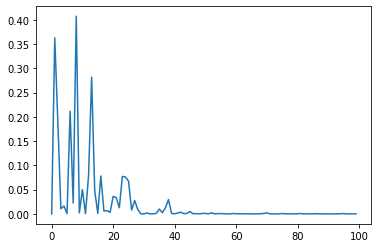

In [149]:
plt.plot(np.square(errors))

In [152]:
coefficients[:, -1]

array([-0.83153193,  0.01476119])

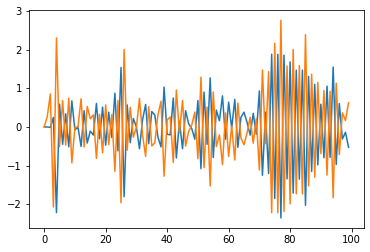

In [160]:
base = range(0, 100)
plt.plot(base, outputs, base, x)

In [87]:
LMS.tapped_x(x, wo.shape[0], 1)

range(9, -1, -1)

In [67]:
x[1]

-0.5896773598463078

In [70]:
x[2]

-0.03822320175474114